<a href="https://colab.research.google.com/github/naavsaa/Hactiv8-Python/blob/master/Hactiv8/Model_Prediction_for_Chilli_Price_Final_Project_Batch_062_Maruli_Asvan_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#        MODEL PREDIKSI HARGA CABAI MERAH DI SUMATERA UTARA

# Briefing and Problem Description

Cabai Merah merupakan salah satu komoditas holtikultura yang sangat banyak di gunakan di Indonesia. 
namun jika melihat pasar, harga cabai merah sangat berfluktuasi tergantung dari banyak kondisi mulai dari demand, kondisi alam, harga bbm untuk distribusi, dan hari raya/hari libur. Harga cabai merah pun berbeda-beda antara 1 daerah dengan daerah lain nya terutama beda provinsi. 


Fluktuasi dari harga ini dapat mengakibatkan petani mendapatkan untung besar atau rugi besar saat harga nya jatuh.

Model ini di tujukan untuk dapat membuat prediksi trend harga cabai merah di sumatera utara, agar petani cabai dapat memprediksi apakah mereka harus mulai menanam, segera panen atau bahkan mempersiapkan untuk mengalihkan distribusi cabai nya ke daerah lain jika di sumatera utara harga nya jatuh

In [6]:
# Import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

# Data Read

Data yang di gunakan merupakan data yang di kumpulkan dari berbagai sumber seperti: siharapanku (sistem harga pangan sumatera utara), raw data iklim bmkg, data harga pupuk dan data produksi cabai dari bps, dan data histori harga bbm solar.

Adapun data defenisi harga (mahal, normal dan murah) merupakan hasil survey ke pembeli dan petani di level mana harga cabai dapat di kategorikan mahal, normal ataupun murah. berdasarkan survey, didapat range harga normal adalah 29000-35000

Data yang di dapat adalah data dari tahun 2020-2021

In [7]:
from google.colab import drive   
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/Dataset/Food

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Colab Notebooks/Dataset/Food


In [8]:
df= pd.read_excel("Dataset Harga Cabai Merah Sumut 2020-2021.xlsx",header=[0])


In [9]:
df.head()

,Tanggal,Bulan,Libur Nasional,Harga BBM (Solar),Harga Pupuk Urea per kg,Harga Pupuk SP per kg,Harga Pupuk NPK per kg,Pupuk Organik,Harga Pestisida,Total Produksi Sumut,Total Produksi Nasional,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,Musim,Harga Cabai Merah,Def Harga
0,2020-01-01,1,Yes,6619,1800,2000,3000,500,NaN,NaN,78383.0,NaN,NaN,NaN,NaN,15.5,NaN,3.0,340.0,2.0,N,Hujan,38000,Mahal
1,2020-01-02,1,Yes,6619,1800,2000,3000,500,NaN,NaN,78383.0,NaN,NaN,NaN,NaN,15.5,NaN,3.0,340.0,2.0,N,Hujan,38000,Mahal
2,2020-01-03,1,No,6619,1800,2000,3000,500,NaN,NaN,78383.0,NaN,NaN,NaN,NaN,15.5,NaN,3.0,340.0,2.0,N,Hujan,38000,Mahal
3,2020-01-04,1,No,6619,1800,2000,3000,500,NaN,NaN,78383.0,NaN,NaN,NaN,NaN,15.5,NaN,3.0,340.0,2.0,N,Hujan,38000,Mahal
4,2020-01-05,1,No,6619,1800,2000,3000,500,NaN,NaN,78383.0,NaN,NaN,NaN,NaN,15.5,NaN,3.0,340.0,2.0,N,Hujan,38000,Mahal


# Data Cleansing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Tanggal                  725 non-null    datetime64[ns]
 1   Bulan                    725 non-null    int64         
 2   Libur Nasional           725 non-null    object        
 3   Harga BBM (Solar)        725 non-null    int64         
 4   Harga Pupuk Urea per kg  725 non-null    int64         
 5   Harga Pupuk SP per kg    725 non-null    int64         
 6   Harga Pupuk NPK per kg   725 non-null    int64         
 7   Pupuk Organik            725 non-null    int64         
 8   Harga Pestisida          0 non-null      float64       
 9   Total Produksi Sumut     0 non-null      float64       
 10  Total Produksi Nasional  725 non-null    float64       
 11  Tn                       538 non-null    float64       
 12  Tx                       0 non-null 

Note from BMKG data:
8888: data tidak terukur; 
9999: Tidak Ada Data (tidak dilakukan pengukuran);
"Tn: Temperatur minimum	 (°C)";
Tx: Temperatur maksimum (°C);
Tavg: Temperatur rata-rata (°C);
RH_avg: Kelembapan rata-rata (%);
RR: Curah hujan (mm);
ss: Lamanya penyinaran matahari (jam);
ff_x: Kecepatan angin maksimum (m/s);
ddd_x: Arah angin saat kecepatan maksimum (°);
ff_avg: Kecepatan angin rata-rata (m/s);
ddd_car: Arah angin terbanyak (°);

In [11]:
# Replace some of the column name
df = df.rename({'Tn': 'Temp min','Tx':'Temp max', 'Tavg': 'Temp rata-rata','RR': 'Curah hujan',
                'ss':'Lamanya matahari', 'ff_x': 'Kecepatan angin max', 'ddd_x': 'Arah angin',
                'ff_avg': 'Kecepatan angin avg','ddd_car': 'Arah angin max'}, axis=1)

In [12]:
# Remove column that has no data
df=df.drop(['Harga Pestisida'],axis=1)
df=df.drop(['Total Produksi Sumut'],axis=1)
df=df.drop(['Temp max'],axis=1)
df=df.drop(['Temp rata-rata'],axis=1)
df=df.drop(['RH_avg'],axis=1)
df=df.drop(['Lamanya matahari'],axis=1)

In [13]:
# Replace value 8888 and 9999 in BMKG data with previous value
df=df.replace('8888', np.nan)
df=df.replace('9999', np.nan)

In [14]:
#Fill blank data in BMKG data by previous value
df['Temp min'].fillna(method='ffill', inplace=True)
df['Temp min'].fillna(method='bfill', inplace=True)
df['Curah hujan'].fillna(method='ffill', inplace=True)
df['Kecepatan angin max'].fillna(method='ffill', inplace=True)
df['Arah angin'].fillna(method='ffill', inplace=True)
df['Kecepatan angin avg'].fillna(method='ffill', inplace=True)
df['Arah angin max'].fillna(method='ffill', inplace=True)

In [15]:
# Check Libur Nasional Column
df['Libur Nasional'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
#Change Column Libur National, Yes=1 and No=0
df['Libur Nasional']=df['Libur Nasional'].replace('Yes', 1)
df['Libur Nasional']=df['Libur Nasional'].replace('No', 0)

In [17]:
df['Def Harga'].unique()

array(['Mahal ', 'Normal', 'Murah'], dtype=object)

In [18]:
#Change Column Def Harga, Murah=0, Normal=1 and Mahal=2
df['Def Harga']=df['Def Harga'].replace('Murah', 0)
df['Def Harga']=df['Def Harga'].replace('Normal', 1)
df['Def Harga']=df['Def Harga'].replace('Mahal ', 2)

In [19]:
# Encode labels of column with data type:object.

label_encoder = preprocessing.LabelEncoder()

df['Arah angin max']= label_encoder.fit_transform(df['Arah angin max'])
df['Musim']= label_encoder.fit_transform(df['Musim'])

In [20]:
# Set Date as Index
df=df.set_index('Tanggal')

In [21]:
# Check if there still nan value in dataset
df.isna().sum()

Bulan                      0
Libur Nasional             0
Harga BBM (Solar)          0
Harga Pupuk Urea per kg    0
Harga Pupuk SP per kg      0
Harga Pupuk NPK per kg     0
Pupuk Organik              0
Total Produksi Nasional    0
Temp min                   0
Curah hujan                0
Kecepatan angin max        0
Arah angin                 0
Kecepatan angin avg        0
Arah angin max             0
Musim                      0
Harga Cabai Merah          0
Def Harga                  0
dtype: int64

# Data Exploratory

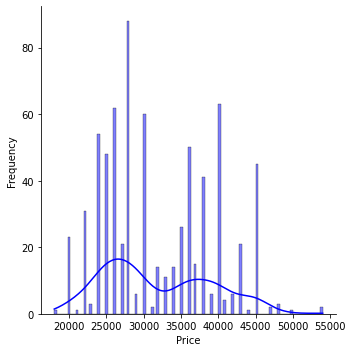

In [22]:
# Plot Histogram dari Harga Cabai di Sumatera Utara
Graph_Price= sns.displot(df['Harga Cabai Merah'], bins=100, kde=True,color='blue')
Graph_Price.set(xlabel="Price", ylabel="Frequency")

Text(0.5, 0, 'Tanggal')

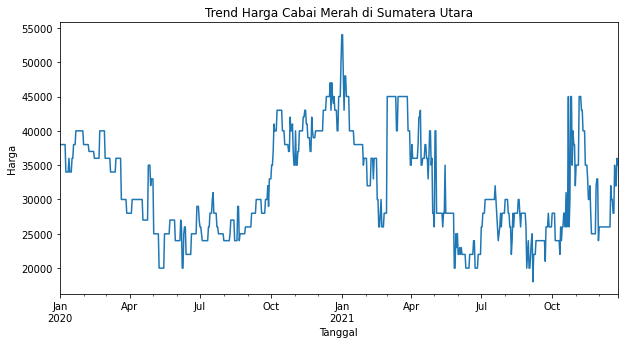

In [23]:
df['Harga Cabai Merah'].plot(figsize=(10,5))
plt.title('Trend Harga Cabai Merah di Sumatera Utara')
plt.ylabel('Harga')
plt.xlabel('Tanggal')

In [24]:
round(df['Harga Cabai Merah'].describe(),0)

count      725.0
mean     31825.0
std       7266.0
min      18000.0
25%      26000.0
50%      30000.0
75%      38000.0
max      54000.0
Name: Harga Cabai Merah, dtype: float64

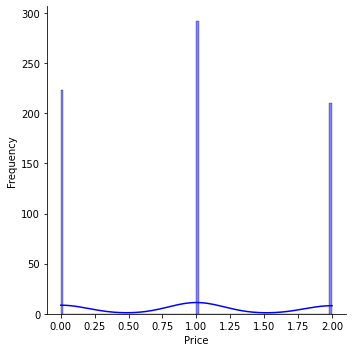

In [25]:
Graph_def_Price= sns.displot(df['Def Harga'], bins=100, kde=True,color='blue')
Graph_def_Price.set(xlabel="Price", ylabel="Frequency")

Murah=0, Normal=1 and Mahal=2

Semua defenisi harga memiliki distribusi yang cukup merata

# Split Data: Data Train & Data Test

In [26]:
# Define x, y and z
x = df.loc[:, df.columns != 'Harga Cabai Merah']
x = x.drop(['Def Harga'],axis=1)
y = df.loc[:, df.columns == 'Harga Cabai Merah']

x2 = df.loc[:, df.columns != 'Def Harga']
z = df.loc[:, df.columns == 'Def Harga']

In [27]:
# Data Split into Data Train and Data Test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [28]:
x2_train, x2_test, z_train, z_test = train_test_split(x2, z,test_size=0.3, random_state=0,stratify=z)

In [29]:
# Standarization
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [30]:
x2_train = scaler.fit_transform(x_train)
x2_test= scaler.fit_transform(x_test)

# Model with Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
model_LR = LinearRegression()

In [33]:
model_LR.fit(x_train, y_train)

LinearRegression()

In [34]:
LR_pred = model_LR.predict(x_test)

In [35]:
LR= y_test.copy()
LR.loc[:, ('Prediction')]=LR_pred
LR = LR.rename({'Harga Cabai Merah': 'Actual'}, axis=1)

Text(0.5, 0, 'Tanggal')

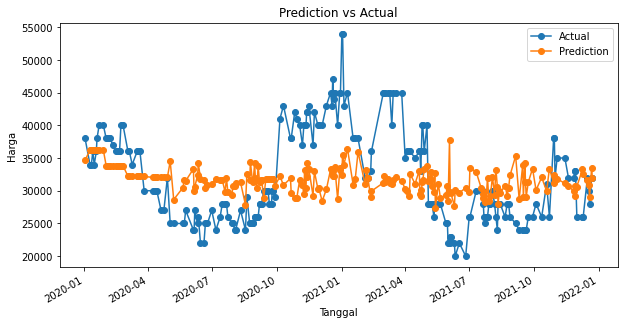

In [36]:
# Plot Prediction vs Actual
LR.plot(marker='o' , figsize=(10,5))
plt.title('Prediction vs Actual')
plt.ylabel('Harga')
plt.xlabel('Tanggal')

In [37]:
#Correlation from prediction vs actual
print("Correlation dari prediksi vs actual=",round(r2_score(LR['Actual'], LR['Prediction']),2))

Correlation dari prediksi vs actual= 0.08


Dengan menggunakan simple linear regression, model yang di hasilkan memiliki korelasi yang sangat buruk. Maka dari itu di perlukan model lain yang dapat menghasilkan korelasi yang tinggi.

# Model with KNN Regression

**Model Training

In [38]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

Modeling Features and Harga (Number)

In [39]:
#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model_knn = GridSearchCV(knn, params, cv=5)

In [40]:
model_knn.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [41]:
y_pred = model_knn.predict(x_test)

**Prediction Trend

In [42]:
knn= y_test.copy()
knn.loc[:, ('Prediction')]=y_pred
knn = knn.rename({'Harga Cabai Merah': 'Actual','y_pred':'Predicition'}, axis=1)

Text(0.5, 0, 'Tanggal')

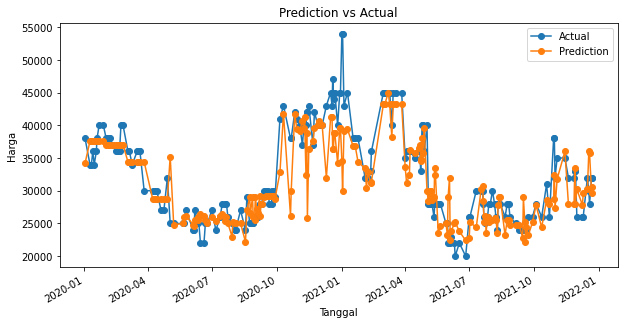

In [43]:
# Plot Prediction vs Actual
knn.plot(marker='o' , figsize=(10,5))
plt.title('Prediction vs Actual')
plt.ylabel('Harga')
plt.xlabel('Tanggal')


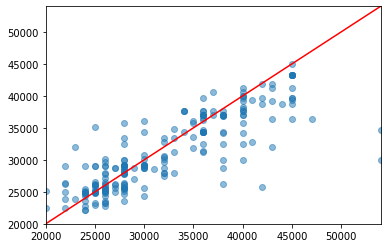

In [44]:

lineStart = knn['Actual'].min() 
lineEnd = knn['Actual'].max()

plt.figure()
plt.scatter(knn['Actual'], knn['Prediction'], alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

In [45]:
#Correlation from prediction vs actual
print("Correlation dari prediksi vs actual=",round(r2_score(knn['Actual'], knn['Prediction']),2))

Correlation dari prediksi vs actual= 0.68


dengan menggunakan model KNN regression, didapat korelasi 0,67 dan visualisasi dari trend terlihat cukup bagus, namun kita akan mencoba model lain dengan hasil korelasi yang lebih tinggi lagi

# Model with SVR Method

In [46]:
x3=x.copy()
y3=y.copy()
x3_train=x_train.copy()
x3_test=x_test.copy()
y3_train=y_train.copy()
y3_test=y_test.copy()

In [47]:
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.pipeline import make_pipeline

In [48]:
model_svr = SVR(kernel = 'linear', C=15)
model_svr.fit(x3_train, y3_train['Harga Cabai Merah'])

SVR(C=15, kernel='linear')

In [49]:
y3_pred = model_svr.predict(x3_test)

In [50]:
svr= y3_test.copy()
svr.loc[:, ('Prediction')]=y3_pred
svr = svr.rename({'Harga Cabai Merah': 'Actual','y_pred':'Predicition'}, axis=1)

Text(0.5, 0, 'Tanggal')

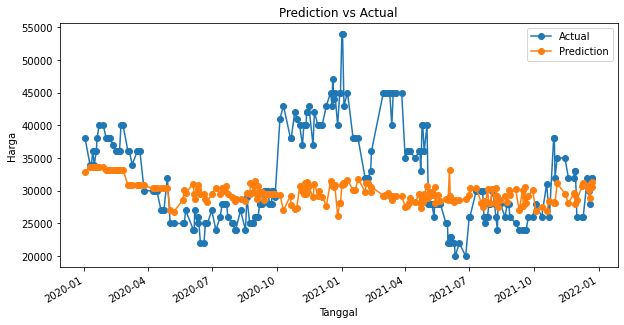

In [51]:
# Plot Prediction vs Actual
svr.plot(marker='o' , figsize=(10,5))
plt.title('Prediction vs Actual')
plt.ylabel('Harga')
plt.xlabel('Tanggal')

# Model with Random Forest Regressor

In [52]:
x4=x.copy()
y4=y.copy()
x4_train=x_train.copy()
x4_test=x_test.copy()
y4_train=y_train.copy()
y4_test=y_test.copy()

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model_rfr = RandomForestRegressor(max_depth=5)
model_rfr.fit(x4_train, y4_train['Harga Cabai Merah'])

RandomForestRegressor(max_depth=5)

In [55]:
y4_pred=model_rfr.predict(x4_test)

In [56]:
rfr= y4_test.copy()
rfr.loc[:, ('Prediction')]=y4_pred
rfr = rfr.rename({'Harga Cabai Merah': 'Actual','y_pred':'Predicition'}, axis=1)

Text(0.5, 0, 'Tanggal')

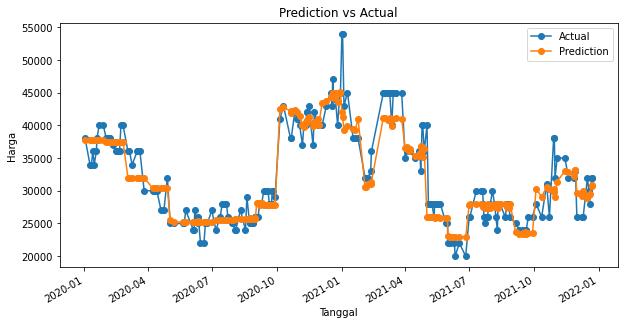

In [57]:
# Plot Prediction vs Actual
rfr.plot(marker='o' , figsize=(10,5))
plt.title('Prediction vs Actual')
plt.ylabel('Harga')
plt.xlabel('Tanggal')

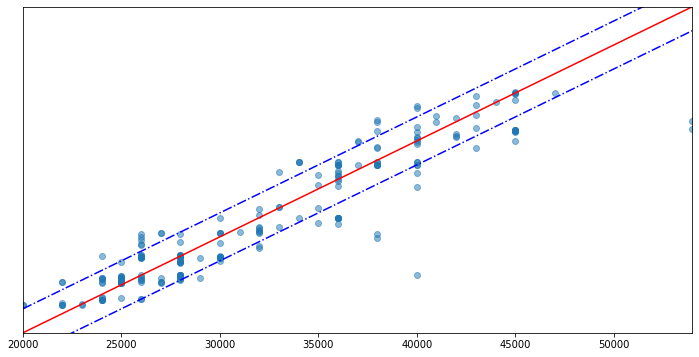

In [58]:
lineStart = rfr['Actual'].min() 
lineEnd = rfr['Actual'].max()

plt.figure(figsize=(12,6))
plt.scatter(rfr['Actual'], rfr['Prediction'], alpha=0.5)
plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-', color = 'r')
plt.plot([lineStart, lineEnd], [lineStart+2500, lineEnd+2500],'-.', 'k-', color = 'b')
plt.plot([lineStart, lineEnd], [lineStart-2500, lineEnd-2500],'-.', 'k-', color = 'b')
plt.xlim(lineStart, lineEnd)
plt.ylim(lineStart, lineEnd)
plt.show()

Grafik diatas menunjukkan asumsi batas toleransi harga +_ 2500

In [59]:
#Correlation from prediction vs actual
print("Correlation dari prediksi vs actual model Random Forest Regressor=",round(r2_score(rfr['Actual'], rfr['Prediction']),2))

Correlation dari prediksi vs actual model Random Forest Regressor= 0.86


# Klasifikasi Harga (Mahal, Normal & Murah) dengan Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x2_train, z_train.values.ravel())

RandomForestClassifier()

In [62]:
z_pred = rf_clf.predict(x2_test)

In [63]:
print ("Accuracy of Random Forest = ",accuracy_score(z_test, z_pred))

Accuracy of Random Forest =  0.3211009174311927


In [64]:
confusion_matrix(z_test, z_pred)

array([[26, 27, 14],
       [35, 31, 22],
       [25, 25, 13]])

In [65]:
print(classification_report(z_test, z_pred))

              precision    recall  f1-score   support

           0       0.30      0.39      0.34        67
           1       0.37      0.35      0.36        88
           2       0.27      0.21      0.23        63

    accuracy                           0.32       218
   macro avg       0.31      0.32      0.31       218
weighted avg       0.32      0.32      0.32       218



In [66]:
model_rf= z_test.copy()
model_rf.loc[:,('Prediction')]=z_pred
model_rf = model_rf.rename({'Def Harga': 'Actual','z_pred':'Prediciton'}, axis=1)

Hasil Random Forest Classification menunjukkan hasil yang tidak bagus, sehingga klasifikasi berdasarkan defenisi harga tidak dapat dipakai

# Model Deployment

Dari Semua Tipe Model, Random Forest Regressor memberikan hasil korelasi yang terbaik yaitu R2= 0,87. 


atau R2=0,76 saat menggunakan data training-test dengan random state =1

Sehingga dapat di simpulkan Random Forest Regressor Model akan dipakai untuk model deployment

In [67]:
import pickle

In [68]:
pickle.dump(model_rfr, open('chilli_price_prediction_model.pkl','wb'))

# Conclusion

Modeling dengan menggunakan random forest regressor memberikan hasil yang paling baik dibandingkan beberapa percobaan dengan metode lain.
Namun ada kelemahan dengan menggunakan metode ini yaitu kemungkinan terjadi nya overfitting.

Ada pun dari dataset masih ada banyak hal yang perlu di improve seperti data iklim bmkg yang tidak lengkap seperti temperature maximum, temperatur rata-rata, dan lama penyinaran matahari tidak ada, padahal ketiga parameter ini merupakan parameter yang penting dalam pertumbuhan tanaman cabai, sehingga dapat mempengaruhi jumlah produksi dan harga.

Diperlukan juga data tambahan dari parameter lain yang kemungkinan mempengaruhi harga cabai, dan dari tahun sebelum nya (sebelum tahun 2019) untuk meningkatkan hasil korelasi R2 dari model yang ada